### Regression exercise

Today, we will fit different polynomial regression to randomly generated data and explore how our loss function behaves. We will use the formulas, introduced in the theoretical sections and create a linear regression model from scratch. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Task 1

Write a function psi(x,m) defined as $\psi(x)=[1, x, x ^2, ..., x^m]$

In [2]:
def psi(x, m):
    return [x**m for m in range(m+1)]

In [3]:
# test

psi(2, 5)

[1, 2, 4, 8, 16, 32]

#### Task 2

Write a function $h(x,\alpha)$ defined as $h(x,\alpha)=\alpha^T\psi(x)$

In [4]:
def h(x, m, alpha):
    return np.dot(alpha.T, psi(x, m))

In [5]:
# test
array = np.array([[2,3,4], [1,2,3], [4,5,6], [6,7,8]])

h(2, 3, array)

array([68, 83, 98])

#### Task 3
Create a random 3rd order polynomial (we call it p3)

In [6]:
p3 = np.poly1d([1, 2, 3, 4])
## return 1*x**3 + 2*x**2 + 3*x + 4

In [21]:
# test

p3(3)
## 1*3**3 + 2*3**2 + 3*3 + 4 = 58

58

#### Task 4
Choose an interval [a,b], on which the polynomial is S-shaped.

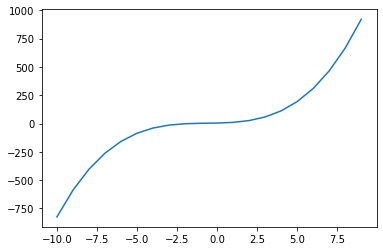

In [8]:
x = list(range(-10, 10))
y = [p3(ele) for ele in x]

plt.plot(x, y)
plt.show()

In [9]:
[a, b] = [-10, 10]

#### Task 5
Sample 30 random values in [a,b] and stored them in `xs`.

In [10]:
# xs is np.array

xs = np.linspace(a, b, 30)

In [11]:
# test

xs

array([-10.        ,  -9.31034483,  -8.62068966,  -7.93103448,
        -7.24137931,  -6.55172414,  -5.86206897,  -5.17241379,
        -4.48275862,  -3.79310345,  -3.10344828,  -2.4137931 ,
        -1.72413793,  -1.03448276,  -0.34482759,   0.34482759,
         1.03448276,   1.72413793,   2.4137931 ,   3.10344828,
         3.79310345,   4.48275862,   5.17241379,   5.86206897,
         6.55172414,   7.24137931,   7.93103448,   8.62068966,
         9.31034483,  10.        ])

#### Task 6
For each x in xs, compute p3(x) and store them as `ys`.

In [12]:
# ys is np.array

ys = p3(xs)

In [13]:
ys

array([-8.26000000e+02, -6.57610152e+02, -5.13887162e+02, -3.92862930e+02,
       -2.92569355e+02, -2.11038337e+02, -1.46301775e+02, -9.63915700e+01,
       -5.93396203e+01, -3.31778261e+01, -1.59380868e+01, -5.65230227e+00,
       -3.52371971e-01,  1.92980442e+00,  3.16232728e+00,  5.31329698e+00,
        1.03508139e+01,  2.02429784e+01,  3.69578909e+01,  6.24636516e+01,
        9.87283611e+01,  1.47720120e+02,  2.11407028e+02,  2.91757186e+02,
        3.90738694e+02,  5.10319652e+02,  6.52468162e+02,  8.19152323e+02,
        1.01234024e+03,  1.23400000e+03])

#### Task 7:
Plot `ys` against `xs` on [a,b]. Does it look like a third order polynomial?

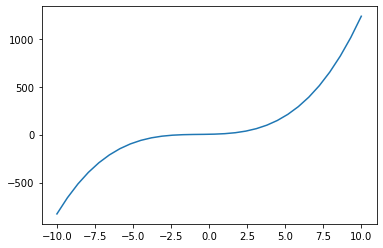

In [14]:
# has to be yes

plt.plot(xs, ys)
plt.show()

## Fitting the data

We will try to fit the data by a polynomial of order m=2. 

#### Task 8:

Using xs and psi, create the matrix X defined as 

<img src="matrixX.png">

In [15]:
X = np.array([psi(x, m=2)[1:] for x in xs])
# X = psi(xs, m=2)

In [16]:
X

array([[-10.        , 100.        ],
       [ -9.31034483,  86.68252081],
       [ -8.62068966,  74.31629013],
       [ -7.93103448,  62.90130797],
       [ -7.24137931,  52.43757432],
       [ -6.55172414,  42.92508918],
       [ -5.86206897,  34.36385256],
       [ -5.17241379,  26.75386445],
       [ -4.48275862,  20.09512485],
       [ -3.79310345,  14.38763377],
       [ -3.10344828,   9.6313912 ],
       [ -2.4137931 ,   5.82639715],
       [ -1.72413793,   2.97265161],
       [ -1.03448276,   1.07015458],
       [ -0.34482759,   0.11890606],
       [  0.34482759,   0.11890606],
       [  1.03448276,   1.07015458],
       [  1.72413793,   2.97265161],
       [  2.4137931 ,   5.82639715],
       [  3.10344828,   9.6313912 ],
       [  3.79310345,  14.38763377],
       [  4.48275862,  20.09512485],
       [  5.17241379,  26.75386445],
       [  5.86206897,  34.36385256],
       [  6.55172414,  42.92508918],
       [  7.24137931,  52.43757432],
       [  7.93103448,  62.90130797],
 

#### Task 9
Compute the optimal $\alpha$ using the expression $\alpha = (XX^T)^+Xy$ where $(XX^T)^+$ is the pseudoinverse matrix. y is our `ys` from the Task 6.

In [17]:
# + = pseudo inverse (np.linalg.inv) ???np.linalg.pinv
# use .dot()

# np.linalg.inv(np.dot(X, X.T)).dot(X) * ys

# alpha = np.dot(np.dot(np.linalg.pinv(np.dot(X, X.T)), X), ys)
# alpha = np.linalg.pinv(X.dot(X.T)).dot(X)
np.linalg.pinv(X).shape

(2, 30)

In [18]:
alpha

NameError: name 'alpha' is not defined

#### Task 10
Plot the data and the computed polynomial. Does it fit?

In [ ]:
# no, m=2 can't fit m=3

plt.plot(alpha[:,0], alpha[:,1])
plt.show()

#### Task 11
Repeat the process for m=3,…,10. What do you observe?

In [ ]:
# m=3 fits the best

#### Task 12
Plot the value of the loss (defined as $ l(\alpha^Tx, y) = \sum(\alpha^Tx - y)^2 $  ) for m=2,…,10. y is our `ys` from the Task 6. What do you observe? Could you tell the optimal m from the plot?